In [36]:
import keras
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer

In [56]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [57]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [58]:
print("Train data:", len(train_data), ", Test Data:", len(test_data))

Train data: 8982 , Test Data: 2246


In [59]:
# display the first article from the training set
# it's an array of integers; each integer corresponds to a word in a dictionary
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [60]:
# let's get the dictionary and decode the first article in the training set
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [62]:
def decode_wire(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

In [63]:
# print the decoded article
decode_wire(train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [73]:
# create a pandas dataframe with all train data and labels and save to csv
# you can use this CSV with automated ML for instance
import pandas as pd
data = []
for i, newswire in enumerate(train_data):
    data.append([decode_wire(newswire), train_labels[i]])
    
df = pd.DataFrame(data, columns = ['newswire', 'category'])

df.to_csv('newswires.csv')

In [79]:
# Vectorization

# Vectorize the train and test data with one-hot encoding. Do the same for the labels

# vectorization of the train and test data using one-hot encoding
# each article is a vector with 10000 items which corresponds to number of words (see first cell - num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)  

In [80]:
# our training data is now in x_train; 8982 vectors with each vector of 10000 items corresponding to an article
print(x_train.shape)

(8982, 10000)


In [84]:
# first article one-hot encoded
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [85]:
# vectorize the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [86]:
# print the first vectorized label of the training set
print(one_hot_train_labels[0])

# how many categories do we have (corresponds to the length of a one-hot encoded label)
print(len(one_hot_train_labels[0]))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46


In [87]:
# Create the model (dense neural network)
from tensorflow.keras import models
from tensorflow.keras import layers

nn = models.Sequential()
nn.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
nn.add(layers.Dense(64, activation='relu'))
nn.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [88]:
# for softmax use the categorical_crossentropy loss function
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
# set aside some values for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [90]:
# fit the model based in 9 epochs - with the above settings and after experimentation 9 epochs will do
history = nn.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 537us/sample - loss: 2.5544 - acc: 0.5368 - val_loss: 1.7125 - val_acc: 0.6530
Epoch 2/9
7982/7982 [==============================] - 3s 424us/sample - loss: 1.3959 - acc: 0.7096 - val_loss: 1.2812 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 3s 398us/sample - loss: 1.0218 - acc: 0.7818 - val_loss: 1.1100 - val_acc: 0.7660
Epoch 4/9
7982/7982 [==============================] - 3s 386us/sample - loss: 0.7954 - acc: 0.8361 - val_loss: 1.0133 - val_acc: 0.7880
Epoch 5/9
7982/7982 [==============================] - 3s 384us/sample - loss: 0.6321 - acc: 0.8710 - val_loss: 0.9344 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 3s 390us/sample - loss: 0.5059 - acc: 0.8953 - val_loss: 0.8989 - val_acc: 0.8240
Epoch 7/9
7982/7982 [==============================] - 3s 386us/sample - loss: 0.4091 - acc: 0.9136 - val_loss: 0.8794 - val_acc: 

In [91]:
# evaluate the model and print the results
results = nn.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 1s 494us/sample - loss: 1.0032 - acc: 0.7890
[1.0032144348640475, 0.78895813]


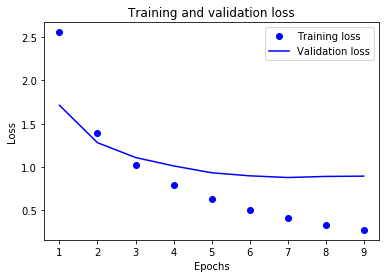

In [93]:
# plot training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

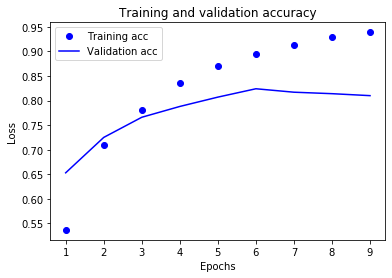

In [94]:
# plot accuracy
plt.clf()                                                

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [95]:
# use the model to predict on the entire test set
pred = nn.predict(x_test)

In [96]:
# the prediction matrix contains the results for each of the 2246 articles in the test set
print(pred.shape)

(2246, 46)


In [97]:
# the prediction for the first article is 3 -- earn
print(np.argmax(pred[0]))

3


In [98]:
# the actual label is 3 -- earn so in this case the prediction matches
print(np.argmax(one_hot_test_labels[0]))

3
